In [34]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

### Problem 1

The equation we want to solve is: 

$\hspace{2cm}\ddot{\theta}(t) + b  \dot{\theta} + c \sin(\theta) = 0\\$

To solve this we can define: 
 
 $\hspace{3.5 cm}\dot{\theta}(t) = \omega(t) \\
 \hspace{3.5 cm} \dot{\omega}(t) = -b \omega(t) - c sin(\theta)$


$\hspace{3.5 cm} \frac{d}{dt} \begin{pmatrix}
  \theta(t) \\
  \omega(t) \\
\end{pmatrix} =  \begin{pmatrix}
  \omega(t) \\
  -b \omega(t) - c sin(\theta(t)) \\
\end{pmatrix} $


Initial conditions: 

$ \hspace{3.5 cm} \theta(0) = \pi, \dot{\theta(0)} = 0$


In [35]:
# define the odes to solve 
def dsdt(s,t,b,c):
    theta,omega = s
    return  [omega, -b*omega - c*np.sin(theta)]

In [36]:
# define constants and intial values 
b,c = 0.25,5.0
y0 = [np.pi -0.01, 0]

t = np.linspace(0,10,101)

In [37]:
# solve the ode using odeint

sol = odeint(dsdt,y0,t,args=(b,c))
theta,omega = sol.T[0],sol.T[1]

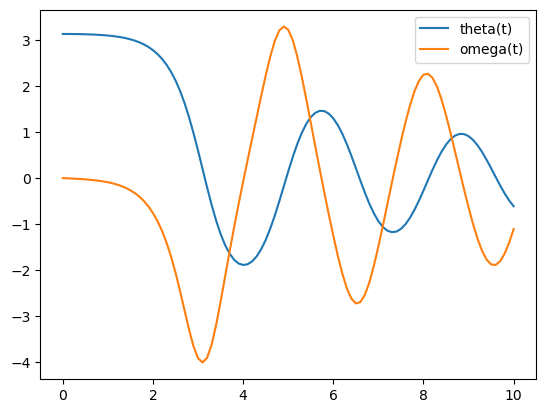

In [38]:
# plot the data 
plt.plot(t,theta,label='theta(t)')
plt.plot(t,omega,label='omega(t)')
plt.legend(loc='best')

### Problem 2

The sky diving problem

$$\frac{dv_x}{dt} = -\frac{b}{m}\sqrt{v_x^2 + v_y^2} \cdot v_x $$
$$\frac{dv_y}{dt} = - g -\frac{b}{m}\sqrt{v_x^2 + v_y^2} \cdot v_y $$




In [39]:
# define the functions (RHS of above coupled PDEs) to integrate wrt t
def dVdt(V,t,b,m,g):
    v_x,v_y = V
    return [-b/m * np.sqrt(v_x**2 + v_y**2)*v_x,
            -g -b/m * np.sqrt(v_x**2 + v_y**2)*v_y]


In [40]:
# define the constants and the time domain 
m,g = 80,9.81
vt = -55
b = m*g/vt**2
v0x,v0y = 50,0

t = np.linspace(0,150,100)

In [41]:
# solve for vx and vy using odeint 
sol = odeint(dVdt,y0=(v0x,v0y),t=t,args=(b,m,g))
vx = sol.T[0]
vy = sol.T[1]

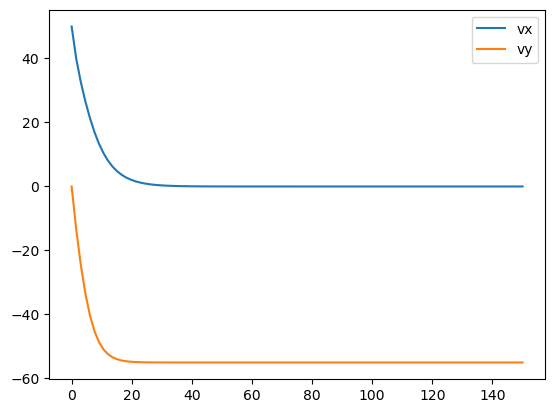

In [44]:
# plot vx and  vy against t 
plt.plot(t,vx,label='vx')
plt.plot(t,vy,label='vy')
plt.legend(loc='best')